**Download MSVA-multiple in kaggle**

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vincemarcs/mvsamultiple")

print("Path to dataset files:", path)

100%|██████████| 901M/901M [00:15<00:00, 60.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vincemarcs/mvsamultiple/versions/1


In [2]:
import os

# Path to the dataset
dataset_path = '/root/.cache/kagglehub/datasets/vincemarcs/mvsamultiple/versions/1'

# List files in the dataset folder
files = os.listdir(dataset_path)
print("Files in the dataset folder:", files)


Files in the dataset folder: ['MVSA']


**convert image and text files to DF**

In [3]:
import pandas as pd
import os

# Path to the dataset
data_folder = '/root/.cache/kagglehub/datasets/vincemarcs/mvsamultiple/versions/1/MVSA/data'

# Prepare a list to store image-text pair data
data = []

# Iterate through files in the folder
for file in os.listdir(data_folder):
    # Check if it's a text file
    if file.endswith('.txt'):
        # Get the corresponding image file
        image_file = file.replace('.txt', '.jpg')
        text_file_path = os.path.join(data_folder, file)
        image_file_path = os.path.join(data_folder, image_file)

        # Read the text content
        with open(text_file_path, 'r') as f:
            text_content = f.read().strip()

        # Add to the data list
        data.append({
            'image_path': image_file_path,
            'text': text_content
        })

# Create a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(df.head())


                                          image_path  \
0  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
1  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
2  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
3  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
4  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   

                                                text  
0  Happy #NationalDogDay even though most of thes...  
1               Seen on Kingsway. #VancouverKingsway  
2  Wanna see more dog costumes? Like maybe a Ninj...  
3  RT “@cherryye: Marcel Aubut speaking to @cbchh...  
4           The last hour you say.. #ShesKindaHotVMA  


In [4]:
df

,image_path,text
0,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,Happy #NationalDogDay even though most of thes...
1,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,Seen on Kingsway. #VancouverKingsway
2,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,Wanna see more dog costumes? Like maybe a Ninj...
3,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,RT “@cherryye: Marcel Aubut speaking to @cbchh...
4,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,The last hour you say.. #ShesKindaHotVMA
...,...,...
19595,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,Nominate us for the Best of Houzz 2016 Custome...
19596,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,Look! #chemtrails in #torontoairshow @BlueAnge...
19597,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,Let's go @BlueJays ThreeUpThreeDown #Yanks #Br...
19598,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,A message from your local #CPC candidate. Oust...


 **create DF label and combination by image,text DF**

In [5]:

with open('/root/.cache/kagglehub/datasets/vincemarcs/mvsamultiple/versions/1/MVSA/labelResultAll.txt', 'r') as file:
    # Read the entire content of the file
    content = file.read()

lines = content.split("\n")

# Split the first line into column names
columns = lines[0].split("\t")

# Split the remaining lines into data rows
rows = [line.split("\t") for line in lines[1:]]

# Create the DataFrame
label_df= pd.DataFrame(rows, columns=columns)
label_df = label_df.iloc[:-1]
label_df = label_df.iloc[:, :2]

label_df

,ID,"text,image"
0,2499,"positive,positive"
1,2500,"neutral,positive"
2,2501,"negative,negative"
3,2502,"positive,positive"
4,2503,"positive,neutral"
...,...,...
19595,22887,"positive,positive"
19596,22888,"positive,positive"
19597,22889,"positive,positive"
19598,22890,"negative,negative"


In [6]:
combined_df = pd.concat([df.reset_index(drop=True), label_df.reset_index(drop=True)], axis=1)
combined_df

,image_path,text,ID,"text,image"
0,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,Happy #NationalDogDay even though most of thes...,2499,"positive,positive"
1,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,Seen on Kingsway. #VancouverKingsway,2500,"neutral,positive"
2,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,Wanna see more dog costumes? Like maybe a Ninj...,2501,"negative,negative"
3,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,RT “@cherryye: Marcel Aubut speaking to @cbchh...,2502,"positive,positive"
4,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,The last hour you say.. #ShesKindaHotVMA,2503,"positive,neutral"
...,...,...,...,...
19595,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,Nominate us for the Best of Houzz 2016 Custome...,22887,"positive,positive"
19596,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,Look! #chemtrails in #torontoairshow @BlueAnge...,22888,"positive,positive"
19597,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,Let's go @BlueJays ThreeUpThreeDown #Yanks #Br...,22889,"positive,positive"
19598,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,A message from your local #CPC candidate. Oust...,22890,"negative,negative"


**Number label with these rules**


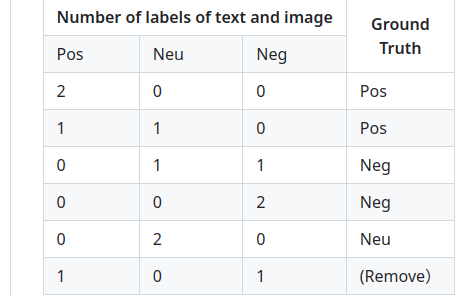

In [7]:
import pandas as pd

# Example DataFrame



# Function to count labels and determine Ground Truth
def determine_ground_truth(row):
    # Split the 'text,image' column into individual labels
    labels = row["text,image"].split(',')
    pos_count = labels.count("positive")
    neu_count = labels.count("neutral")
    neg_count = labels.count("negative")

    # Apply rules
    if pos_count == 2 and neu_count == 0 and neg_count == 0:
        return "Pos"
    elif pos_count == 1 and neu_count == 1 and neg_count == 0:
        return "Pos"
    elif pos_count == 0 and neu_count == 1 and neg_count == 1:
        return "Neg"
    elif pos_count == 0 and neu_count == 0 and neg_count == 2:
        return "Neg"
    elif pos_count == 0 and neu_count == 2 and neg_count == 0:
        return "Neu"
    elif pos_count == 1 and neu_count == 0 and neg_count == 1:
        return "Remove"
    else:
        return None  # For unexpected cases

# Apply the function to create a new "Ground Truth" column
combined_df["Ground Truth"] = combined_df.apply(determine_ground_truth, axis=1)

# Remove rows marked as "Remove"
df = combined_df[combined_df["Ground Truth"] != "Remove"]

# Reset index after removal
df.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
df


,image_path,text,ID,"text,image",Ground Truth
0,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,Happy #NationalDogDay even though most of thes...,2499,"positive,positive",Pos
1,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,Seen on Kingsway. #VancouverKingsway,2500,"neutral,positive",Pos
2,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,Wanna see more dog costumes? Like maybe a Ninj...,2501,"negative,negative",Neg
3,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,RT “@cherryye: Marcel Aubut speaking to @cbchh...,2502,"positive,positive",Pos
4,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,The last hour you say.. #ShesKindaHotVMA,2503,"positive,neutral",Pos
...,...,...,...,...,...
18884,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,Nominate us for the Best of Houzz 2016 Custome...,22887,"positive,positive",Pos
18885,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,Look! #chemtrails in #torontoairshow @BlueAnge...,22888,"positive,positive",Pos
18886,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,Let's go @BlueJays ThreeUpThreeDown #Yanks #Br...,22889,"positive,positive",Pos
18887,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,A message from your local #CPC candidate. Oust...,22890,"negative,negative",Neg


<ipython-input-12-7241c6c8b618>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby("Ground Truth").apply(lambda x: x.sample(min(len(x), sample_size), random_state=42)).reset_index(drop=True)


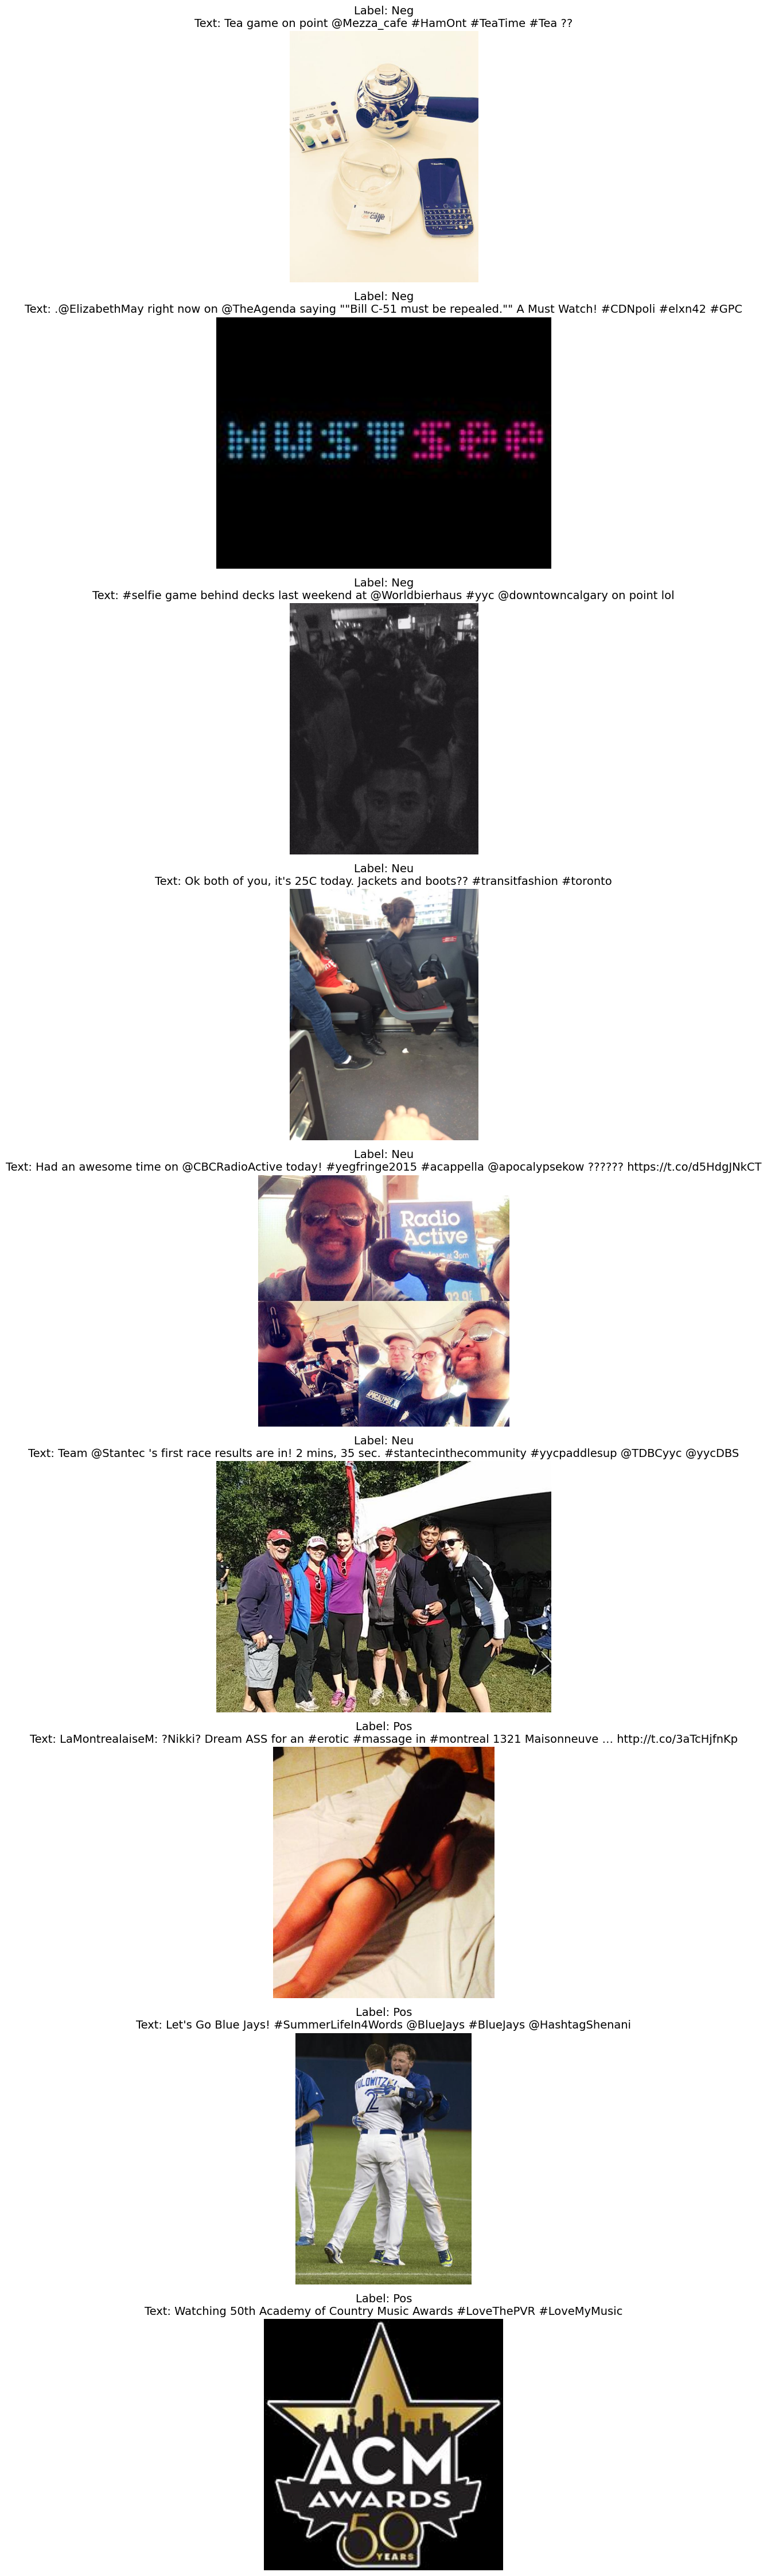

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define sample size per label
sample_size = 3  # Adjust as needed

# Sample data by label
sampled_df = df.groupby("Ground Truth").apply(lambda x: x.sample(min(len(x), sample_size), random_state=42)).reset_index(drop=True)

# Plot images and text
fig, axes = plt.subplots(len(sampled_df), 1, figsize=(10, 5 * len(sampled_df)))

for idx, row in sampled_df.iterrows():
    image_path = row["image_path"]
    text = row["text"]
    label = row["Ground Truth"]

    # Load image using PIL
    if os.path.exists(image_path):
        img = Image.open(image_path)
    else:
        img = None

    # Display image
    ax = axes[idx] if len(sampled_df) > 1 else axes
    if img:
        ax.imshow(img)
    else:
        ax.text(0.5, 0.5, "Image Not Found", fontsize=12, ha='center', va='center')

    ax.set_title(f"Label: {label}\nText: {text}", fontsize=14)
    ax.axis("off")  # Hide axis

plt.tight_layout()
plt.show()


In [13]:
# Map Ground Truth labels to numeric values
df["label"] = df["Ground Truth"].map({"Pos": 2, "Neu":1 ,"Neg":0})
df = df[df['image_path'] != '/root/.cache/kagglehub/datasets/vincemarcs/mvsamultiple/versions/1/MVSA/data/3910.jpg']
df = df[df['image_path'] != '/root/.cache/kagglehub/datasets/vincemarcs/mvsamultiple/versions/1/MVSA/data/5995.jpg']
df = df[df['image_path'] != '/root/.cache/kagglehub/datasets/vincemarcs/mvsamultiple/versions/1/MVSA/data/3151.jpg']
# Display the updated DataFrame
df


<ipython-input-13-e1f9cbffdcd2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = df["Ground Truth"].map({"Pos": 2, "Neu":1 ,"Neg":0})


,image_path,text,ID,"text,image",Ground Truth,label
0,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,Happy #NationalDogDay even though most of thes...,2499,"positive,positive",Pos,2
1,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,Seen on Kingsway. #VancouverKingsway,2500,"neutral,positive",Pos,2
2,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,Wanna see more dog costumes? Like maybe a Ninj...,2501,"negative,negative",Neg,0
3,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,RT “@cherryye: Marcel Aubut speaking to @cbchh...,2502,"positive,positive",Pos,2
4,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,The last hour you say.. #ShesKindaHotVMA,2503,"positive,neutral",Pos,2
...,...,...,...,...,...,...
18884,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,Nominate us for the Best of Houzz 2016 Custome...,22887,"positive,positive",Pos,2
18885,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,Look! #chemtrails in #torontoairshow @BlueAnge...,22888,"positive,positive",Pos,2
18886,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,Let's go @BlueJays ThreeUpThreeDown #Yanks #Br...,22889,"positive,positive",Pos,2
18887,/root/.cache/kagglehub/datasets/vincemarcs/mvs...,A message from your local #CPC candidate. Oust...,22890,"negative,negative",Neg,0


**Download dependency**

In [14]:
pip install torch torchvision transformers openai-clip scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 22.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.2 MB/s eta 0:00:00
  Cr

**load CLIP modle**

In [15]:
import torch
import clip
from PIL import Image
import numpy as np
from sklearn.linear_model import LogisticRegression

# Load CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)


100%|███████████████████████████████████████| 338M/338M [00:05<00:00, 66.5MiB/s]


**text Embedding functio**

In [16]:
def get_text_embedding(texts):
    """
    This function receives a list of texts and returns the CLIP text embeddings.
    """
    # Tokenize and encode text using CLIP
    text_tokens = clip.tokenize(texts).to(device)  # List of strings
    with torch.no_grad():  # Disable gradients for inference
        text_embeddings = model.encode_text(text_tokens)
    return text_embeddings.cpu().numpy()



**image Embedding function**

In [17]:
from PIL import ImageFile

# Allow loading of truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

def get_image_embedding(image_path):
    # Open and preprocess the image
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
    with torch.no_grad():
        image_embedding = model.encode_image(image)
    return image_embedding.cpu().numpy()


**Embedding operations**

In [18]:
import pandas as pd
import numpy as np


# Extract texts and image paths
texts = df['text'].values
image_paths = df['image_path'].values
sentiments = df['label'].values  # Ground Truth label (1.0 for Positive, 0.0 for Negative)

# Extract text embeddings
text_embeddings = np.vstack([get_text_embedding([text]) for text in texts])

# Extract image embeddings


In [ ]:
text_embeddings

array([[ 0.1473 , -0.05276, -0.00989, ...,  0.06537,  0.2467 ,  0.04132],
       [ 0.09644,  0.3245 , -0.2136 , ...,  0.792  ,  0.1229 ,  0.1381 ],
       [ 0.1214 ,  0.238  , -0.11865, ..., -0.06036,  0.09735, -0.2104 ],
       ...,
       [-0.2415 ,  0.7314 , -0.2927 , ...,  0.664  ,  0.2012 ,  0.11707],
       [-0.01727, -0.05478,  0.01869, ...,  0.8975 ,  0.3284 , -0.2969 ],
       [ 0.11676, -0.02774,  0.2047 , ...,  0.7    ,  0.2893 ,  0.06015]],
      dtype=float16)

In [19]:
image_embeddings = np.vstack([get_image_embedding(image_path) for image_path in image_paths])

# Combine the embeddings (horizontal stacking)
combined_embeddings = np.hstack((text_embeddings, image_embeddings))


In [21]:
text_embeddings

array([[ 0.213   , -0.08826 , -0.1227  , ..., -0.7847  ,  0.06085 ,
         0.01755 ],
       [ 0.0593  ,  0.3052  , -0.0858  , ..., -0.1885  ,  0.0578  ,
        -0.3616  ],
       [ 0.319   , -0.01915 ,  0.1129  , ...,  0.671   , -0.05777 ,
         0.1875  ],
       ...,
       [ 0.317   ,  0.2183  ,  0.01028 , ...,  0.3992  , -0.595   ,
        -0.0865  ],
       [ 0.0314  , -0.2079  , -0.1542  , ...,  0.00989 ,  0.001568,
         0.3618  ],
       [ 0.1279  ,  0.1329  ,  0.0517  , ...,  0.0522  ,  0.2788  ,
        -0.04712 ]], dtype=float16)

In [20]:
image_embeddings

array([[-0.1581 , -0.2917 ,  0.02098, ..., -0.681  ,  0.0854 , -0.1584 ],
       [ 0.2301 ,  0.1405 ,  0.143  , ...,  0.1293 , -0.2195 , -0.3262 ],
       [ 0.5615 ,  0.2346 ,  0.0829 , ...,  0.4116 ,  0.10693,  0.2136 ],
       ...,
       [ 0.6064 ,  0.2148 ,  0.1516 , ..., -0.3313 , -0.28   ,  0.01502],
       [ 0.1411 ,  0.3186 ,  0.09344, ...,  0.3247 , -0.043  ,  0.09515],
       [-0.3923 ,  0.171  , -0.0763 , ...,  0.9385 , -0.1848 , -0.1559 ]],
      dtype=float16)

**create Embedding DF**

In [22]:
df_embedded=pd.DataFrame()
df_embedded['text_embedding']=list(text_embeddings)
df_embedded['image_embedding']=list(image_embeddings)
df_embedded['label']=sentiments

In [23]:
df_embedded

,text_embedding,image_embedding,label
0,"[0.213, -0.08826, -0.1227, 0.3157, -0.1299, 0....","[-0.1581, -0.2917, 0.02098, 0.3108, 0.593, -0....",2
1,"[0.0593, 0.3052, -0.0858, -0.0552, -0.2864, -0...","[0.2301, 0.1405, 0.143, -0.2313, 0.02513, -0.1...",2
2,"[0.319, -0.01915, 0.1129, -0.03072, -0.1181, -...","[0.5615, 0.2346, 0.0829, 0.03967, 0.01356, -0....",0
3,"[0.002344, -0.1725, -0.2686, -0.2198, 0.1191, ...","[-0.1307, -0.2656, 0.2018, 0.03094, 0.2883, 0....",2
4,"[0.05563, 0.27, -0.097, -0.4758, 0.004593, -0....","[0.1741, -0.1562, -0.462, 0.262, -0.1528, -0.2...",2
...,...,...,...
18881,"[0.2062, 0.04553, -0.11035, -0.378, 0.0598, 0....","[-0.0644, -0.1274, -0.0369, -0.1171, 0.03918, ...",2
18882,"[0.2042, 0.215, -0.0651, -0.219, -0.1145, 0.17...","[-0.3235, -0.1956, 0.3606, -0.10754, -0.3308, ...",2
18883,"[0.317, 0.2183, 0.01028, 0.3845, 0.016, 0.1754...","[0.6064, 0.2148, 0.1516, -0.08844, -0.1694, 0....",2
18884,"[0.0314, -0.2079, -0.1542, 0.2085, -0.1345, -0...","[0.1411, 0.3186, 0.09344, -0.115, 0.768, -0.02...",0


**save the Embedding to CSV file**

In [ ]:
# Save the DataFrame to a CSV file
df_embedded.to_csv('result_embeddings.csv', index=False)

print("File saved as 'result_embeddings.csv'")


File saved as 'result_embeddings.csv'


**import  dependency**

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.metrics import accuracy_score
from transformers import CLIPProcessor, CLIPModel


**Dataset Class**

In [25]:
class MultimodalDataset(Dataset):
    def __init__(self, text_embeddings, image_embeddings, labels):
        self.text_embeddings = torch.tensor(text_embeddings, dtype=torch.float32)
        self.image_embeddings = torch.tensor(image_embeddings, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.text_embeddings[idx], self.image_embeddings[idx], self.labels[idx]


**Model Definition**:



In [26]:
class MultimodalClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MultimodalClassifier, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, text_embedding, image_embedding):
        combined = torch.cat((text_embedding, image_embedding), dim=-1)
        return self.fc(combined)


**Data Preparation**

In [27]:
def prepare_data(df_embedded):
    """
    Prepares the dataset for training and validation.
    Converts text embeddings, image embeddings, and labels into a usable format.
    """

    text_embeddings = [list(e) for e in df_embedded['text_embedding']]
    image_embeddings = [list(e) for e in df_embedded['image_embedding']]
    labels = df_embedded['label'].tolist()

    return text_embeddings, image_embeddings, labels


**Training Function**

In [41]:
result_accuray=[]
def train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=10):
    """
    Trains the model and evaluates it on the validation set at each epoch.
    """
    for epoch in range(num_epochs):
        # Training Phase
        model.train()
        total_loss = 0
        all_preds = []
        all_labels = []

        for text_embed, image_embed, label in train_loader:
            text_embed, image_embed, label = text_embed.to(device), image_embed.to(device), label.to(device)

            # Forward Pass
            outputs = model(text_embed, image_embed)
            loss = criterion(outputs, label)

            # Backward Pass and Optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            # Collect Predictions for Accuracy
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(label.cpu().numpy())

        train_accuracy = accuracy_score(all_labels, all_preds)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.4f}")
        result_accuray.append({"Epoch":epoch+1,"Accuracy":train_accuracy,"Loss":total_loss/len(train_loader)})

        # Validation Phase
        model.eval()
        val_loss = 0
        val_preds = []
        val_labels = []

        with torch.no_grad():
            for text_embed, image_embed, label in val_loader:
                text_embed, image_embed, label = text_embed.to(device), image_embed.to(device), label.to(device)

                outputs = model(text_embed, image_embed)
                loss = criterion(outputs, label)
                val_loss += loss.item()

                preds = torch.argmax(outputs, dim=1).cpu().numpy()
                val_preds.extend(preds)
                val_labels.extend(label.cpu().numpy())

        val_accuracy = accuracy_score(val_labels, val_preds)
        print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.4f}")

    return model


**Main Function**

In [42]:
def main():
    # Load Pretrained CLIP Model and Processor
    clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
    clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

    # Prepare Data
    text_embeddings, image_embeddings, labels = prepare_data(df_embedded)

    # Create Dataset and Split
    dataset = MultimodalDataset(text_embeddings, image_embeddings, labels)
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    # Model Initialization
    input_dim = len(text_embeddings[0]) + len(image_embeddings[0])  # Sum of embedding dimensions
    hidden_dim = 256
    output_dim = 3  # 3-class classification (Pos, Neu, Neg)

    model = MultimodalClassifier(input_dim, hidden_dim, output_dim)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Training Setup
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=1e-4)

    # Train the Model
    trained_model = train_model(model, train_loader, val_loader, criterion, optimizer, device)

    # Save the Model
    torch.save(trained_model.state_dict(), "multimodal_classifier_3class.pth")

    # Load Trained Model for Inference
    trained_model.eval()  # Set the model to evaluation mode
    # display_sample_predictions(val_loader, trained_model, device)


In [43]:
if __name__ == "__main__":
    main()


Epoch [1/10], Loss: 0.9334, Accuracy: 0.5980
Validation Loss: 0.9267, Validation Accuracy: 0.5926
Epoch [2/10], Loss: 0.9125, Accuracy: 0.6005
Validation Loss: 0.9247, Validation Accuracy: 0.5926
Epoch [3/10], Loss: 0.9008, Accuracy: 0.6005
Validation Loss: 0.9254, Validation Accuracy: 0.5932
Epoch [4/10], Loss: 0.8873, Accuracy: 0.6009
Validation Loss: 0.9274, Validation Accuracy: 0.5929
Epoch [5/10], Loss: 0.8722, Accuracy: 0.6031
Validation Loss: 0.9318, Validation Accuracy: 0.5926
Epoch [6/10], Loss: 0.8566, Accuracy: 0.6093
Validation Loss: 0.9352, Validation Accuracy: 0.5911
Epoch [7/10], Loss: 0.8377, Accuracy: 0.6166
Validation Loss: 0.9438, Validation Accuracy: 0.5916
Epoch [8/10], Loss: 0.8203, Accuracy: 0.6272
Validation Loss: 0.9455, Validation Accuracy: 0.5783
Epoch [9/10], Loss: 0.7999, Accuracy: 0.6403
Validation Loss: 0.9495, Validation Accuracy: 0.5768
Epoch [10/10], Loss: 0.7773, Accuracy: 0.6575
Validation Loss: 0.9585, Validation Accuracy: 0.5828


In [44]:
df_result=pd.DataFrame(result_accuray)
df_result

,Epoch,Accuracy,Loss
0,1,0.597961,0.933365
1,2,0.600477,0.912521
2,3,0.600477,0.900786
3,4,0.600940,0.887295
4,5,0.603058,0.872158
5,6,0.609346,0.856607
6,7,0.616561,0.837748
7,8,0.627217,0.820307
8,9,0.640257,0.799875
9,10,0.657532,0.777270
